In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [92]:
#Import data

##People only - U
path='../results/people_batch_dec12/'
#People
user_path=path+'user_concat.csv'
#Bike
bike_path=path+'bike_concat.csv'
#Get dfs
user_df_u=pd.read_csv(user_path)
bike_df_u=pd.read_csv(bike_path)

##Package only - P
path='../results/package_batch_dec12/'
#Pakcages
package_path=path+'package_concat.csv'
#Bike
bike_path=path+'bike_concat.csv'
#Get dfs
package_df_p=pd.read_csv(package_path)
bike_df_p=pd.read_csv(bike_path)

##Mixed people and package nobid - M_NB
path='../results/mixed_batch_nobid_dec16/'
#People
user_path=path+'user_concat.csv'
#Pakcages
package_path=path+'package_concat.csv'
#Bike
bike_path=path+'bike_concat.csv'
#Get dfs
user_df_m_nb=pd.read_csv(user_path)
package_df_m_nb=pd.read_csv(package_path)
bike_df_m_nb=pd.read_csv(bike_path)


##Mixed people and package bid - M_B
path='../results/mixed_batch_bid_dec16/'
#People
user_path=path+'user_concat.csv'
#Pakcages
package_path=path+'package_concat.csv'
#Bike
bike_path=path+'bike_concat.csv'
#Get dfs
user_df_m_b=pd.read_csv(user_path)
package_df_m_b=pd.read_csv(package_path)
bike_df_m_b=pd.read_csv(bike_path)

In [93]:
#Get the parameter ranges

n_bikes_possible_u=user_df_u['NumBikes'].unique()
n_bikes_possible_u.sort()
print('Num Bikes UsersBatch: ',n_bikes_possible_u)

n_bikes_possible_p=package_df_p['NumBikes'].unique()
n_bikes_possible_p.sort()
print('Num Bikes PackagesBatch: ',n_bikes_possible_p)

n_bikes_possible_m_nb=package_df_m_nb['NumBikes'].unique()
n_bikes_possible_m_nb.sort()
print('Num Bikes MixedNobid: ',n_bikes_possible_m_nb)

n_bikes_possible_m_b=package_df_m_nb['NumBikes'].unique()
n_bikes_possible_m_b.sort()
print('Num Bikes MixedBid: ',n_bikes_possible_m_b)

Num Bikes UsersBatch:  [100 150 200 250 300]
Num Bikes PackagesBatch:  [100 150 200 250 300]
Num Bikes MixedNobid:  [200 300 400 500 600]
Num Bikes MixedBid:  [200 300 400 500 600]


In [94]:
i_size =  n_bikes_possible_u.size

#Users
wait_u=np.zeros(i_size)
served_u=np.zeros(i_size)

#Packages
wait_p=np.zeros(i_size)
served_p=np.zeros(i_size)

#Mixed - nobid
wait_m_nb_u=np.zeros(i_size)
served_m_nb_u=np.zeros(i_size)
wait_m_nb_p=np.zeros(i_size)
served_m_nb_p=np.zeros(i_size)

#Mixed - bid
wait_m_b_u=np.zeros(i_size)
served_m_b_u=np.zeros(i_size)
wait_m_b_p=np.zeros(i_size)
served_m_b_p=np.zeros(i_size)

In [95]:

for i in range(i_size):
    n_bikes_u = n_bikes_possible_u[i]
    n_bikes_p = n_bikes_possible_p[i]
    n_bikes_m_nb = n_bikes_possible_m_nb[i]
    n_bikes_m_b = n_bikes_possible_m_b[i]

    #Users
    temp_u= user_df_u.loc[user_df_u['NumBikes']==n_bikes_u]
    #Compute aveage wait - U
    temp_u_served= temp_u.loc[temp_u['Trip Served']==True]
    sum=temp_u_served['Wait Time (min)'].sum()
    len=temp_u_served['Wait Time (min)'].size
    average_wait_u=sum/len
    #Compute percentage of served trips - U
    count_served=temp_u.loc[temp_u['Trip Served']==True].shape[0]
    count_unserved=temp_u.loc[temp_u['Trip Served']==False].shape[0]
    pct_served_u=(count_served)/(count_served+count_unserved)*100
    #Save
    wait_u[i]=average_wait_u
    served_u[i]=pct_served_u

    #Packages
    temp_p= package_df_p.loc[package_df_p['NumBikes']==n_bikes_p]
    #Compute aveage wait - P
    temp_p_served= temp_p.loc[temp_p['Trip Served']==True]
    sum=temp_p_served['Wait Time (min)'].sum()
    len=temp_p_served['Wait Time (min)'].size
    average_wait_p=sum/len
    #Compute percentage of served trips - P
    count_served=temp_p.loc[temp_p['Trip Served']==True].shape[0]
    count_unserved=temp_p.loc[temp_p['Trip Served']==False].shape[0]
    pct_served_p=(count_served)/(count_served+count_unserved)*100
    #Save
    wait_p[i]=average_wait_p
    served_p[i]=pct_served_p


    #Mixed - No bid
    temp_m_nb_u= user_df_m_nb.loc[user_df_m_nb['NumBikes']==n_bikes_m_nb]
    temp_m_nb_p= package_df_m_nb.loc[package_df_m_nb['NumBikes']==n_bikes_m_nb]
    #Compute aveage wait - U
    temp_u_m_nb_served= temp_m_nb_u.loc[temp_m_nb_u['Trip Served']==True]
    sum=temp_u_m_nb_served['Wait Time (min)'].sum()
    len=temp_u_m_nb_served['Wait Time (min)'].size
    average_wait_u=sum/len
    #Compute percentage of served trips - U
    count_served=temp_m_nb_u.loc[temp_m_nb_u['Trip Served']==True].shape[0]
    count_unserved=temp_m_nb_u.loc[temp_m_nb_u['Trip Served']==False].shape[0]
    pct_served_u=(count_served)/(count_served+count_unserved)*100
    #Save - U
    wait_m_nb_u[i]=average_wait_u
    served_m_nb_u[i]=pct_served_u
    #Compute aveage wait - P
    temp_p_m_nb_served= temp_m_nb_p.loc[temp_m_nb_p['Trip Served']==True]
    sum=temp_p_m_nb_served['Wait Time (min)'].sum()
    len=temp_p_m_nb_served['Wait Time (min)'].size
    average_wait_p=sum/len
    #Compute percentage of served trips - P
    count_served=temp_m_nb_p.loc[temp_m_nb_p['Trip Served']==True].shape[0]
    count_unserved=temp_m_nb_p.loc[temp_m_nb_p['Trip Served']==False].shape[0]
    pct_served_p=(count_served)/(count_served+count_unserved)*100
    #Save - P
    wait_m_nb_p[i]=average_wait_p
    served_m_nb_p[i]=pct_served_p

    #Mixed - Bid
    temp_m_b_u= user_df_m_b.loc[user_df_m_b['NumBikes']==n_bikes_m_b]
    temp_m_b_p= package_df_m_b.loc[package_df_m_b['NumBikes']==n_bikes_m_b]
    #Compute aveage wait - U
    temp_u_m_b_served= temp_m_b_u.loc[temp_m_b_u['Trip Served']==True]
    sum=temp_u_m_b_served['Wait Time (min)'].sum()
    len=temp_u_m_b_served['Wait Time (min)'].size
    average_wait_u=sum/len
    #Compute percentage of served trips - U
    count_served=temp_m_b_u.loc[temp_m_b_u['Trip Served']==True].shape[0]
    count_unserved=temp_m_b_u.loc[temp_m_b_u['Trip Served']==False].shape[0]
    pct_served_u=(count_served)/(count_served+count_unserved)*100
    #Save - U
    wait_m_b_u[i]=average_wait_u
    served_m_b_u[i]=pct_served_u
    #Compute aveage wait - P
    temp_p_m_b_served= temp_m_b_p.loc[temp_m_b_p['Trip Served']==True]
    sum=temp_p_m_b_served['Wait Time (min)'].sum()
    len=temp_p_m_b_served['Wait Time (min)'].size
    average_wait_p=sum/len
    #Compute percentage of served trips - P
    count_served=temp_m_b_p.loc[temp_m_b_p['Trip Served']==True].shape[0]
    count_unserved=temp_m_b_p.loc[temp_m_b_p['Trip Served']==False].shape[0]
    pct_served_p=(count_served)/(count_served+count_unserved)*100
    #Save - P
    wait_m_b_p[i]=average_wait_p
    served_m_b_p[i]=pct_served_p

   


In [96]:
print('Users batch')
print('NumBikes: ',n_bikes_possible_u)
print('User avg wait: ',wait_u)
print('User pct served: ',served_u)
print('--------------------------------')

print('Package batch')
print('NumBikes: ',n_bikes_possible_p)
print('Package avg wait: ',wait_p)
print('Package pct served: ',served_p)
print('--------------------------------')


print('Mixed no bid')
print('NumBikes: ',n_bikes_possible_m_nb)
print('User avg wait: ',wait_m_nb_u)
print('User pct served: ',served_m_nb_u)
print('Package avg wait: ',wait_m_nb_p)
print('Package pct served: ',served_m_nb_p)
print('--------------------------------')

print('Mixed bid')
print('NumBikes: ',n_bikes_possible_m_b)
print('User avg wait: ',wait_m_b_u)
print('User pct served: ',served_m_b_u)
print('Package avg wait: ',wait_m_b_p)
print('Package pct served: ',served_m_b_p)
print('--------------------------------')

Users batch
NumBikes:  [100 150 200 250 300]
User avg wait:  [5.32635417 4.38235876 3.85287018 3.40191474 3.36356134]
User pct served:  [93.84164223 98.91031014 99.53897737 99.91621282 99.83242564]
--------------------------------
Package batch
NumBikes:  [100 150 200 250 300]
Package avg wait:  [9.66871716 5.84093082 4.98685069 4.70127239 4.56331911]
Package pct served:  [100. 100. 100. 100. 100.]
--------------------------------
Mixed no bid
NumBikes:  [200 300 400 500 600]
User avg wait:  [4.65400029 3.96351143 3.61110643 3.39421569 3.17661775]
User pct served:  [97.57017176 99.5810641  99.45538333 99.70674487 99.91621282]
Package avg wait:  [5.68335883 4.33149494 3.95315451 3.62319713 3.39663241]
Package pct served:  [100. 100. 100. 100. 100.]
--------------------------------
Mixed bid
NumBikes:  [200 300 400 500 600]
User avg wait:  [5.42919352 4.72088487 4.31488807 3.95718097 3.57924417]
User pct served:  [74.3466899  91.79039301 94.8930598  98.38145232 98.77515311]
Package avg w

In [97]:
#bike_u_200=bike_df_u.loc[bike_df_u['NumBikes']==200]
bike_u_200= bike_df_m_b.loc[bike_df_m_b['NumBikes']==400]


# Stopped
stopped = bike_u_200.loc[(bike_u_200['Event'] == 'END: wandering') | (bike_u_200['Event'] == 'START: wandering')]
df = stopped
count = 0

stopped_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    event = row["Event"]
    if event == 'END: wandering':
        count = count-1
    elif event == 'START: wandering':
        count = count+1
    else:
        print('Event type error')
    # stopped_count.loc[i] = [i] + [count]
    stopped_count.at[i,'Count'] = count
    stopped_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Low battery
lowbattery = bike_u_200.loc[(bike_u_200['Event']== 'END: low_battery') | (bike_u_200['Event']== 'START: low_battery')]
df = lowbattery
count=0

lowbattery_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: low_battery':
        count = count-1
    elif event == 'START: low_battery':
        count = count+1
    else:
        print('Event type error')
    # lowbattery_count.loc[i] = [i] + [count]
    lowbattery_count.at[i,'Count'] = count
    lowbattery_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Charge
charging = bike_u_200.loc[(bike_u_200['Event'] == 'END: getting_charge') | (bike_u_200['Event'] == 'START: getting_charge') ]
df = charging
count = 0

charging_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: getting_charge':
        count = count-1
    elif event == 'START: getting_charge':
        count = count+1
    elif event == 'END: getting_night_charge':
        count = count-1
    elif event == 'START: getting_night_charge':
        count = count+1
    else:
        print('Event type error')
    charging_count.at[i,'Count'] = count
    charging_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)


# Pick-Up packages
pickup_p = bike_u_200.loc[(bike_u_200['Event'] == 'END: picking_up_packages') | (bike_u_200['Event'] == 'START: picking_up_packages')]
df = pickup_p
count = 0

pickup_p_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_count.loc[i] = [i] + [count]
    pickup_p_count.at[i,'Count'] =  count
    pickup_p_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# In Use - Packages

inuse_p = bike_u_200.loc[(bike_u_200['Event']== 'END: in_use_packages') | (bike_u_200['Event']== 'START: in_use_packages')] 
df = inuse_p
count = 0

inuse_p_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # inuse_count.loc[i] = [i] + [count]
    inuse_p_count.at[i,'Count'] = count
    inuse_p_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up & In Use - Packages

pickup_inuse_p = bike_u_200.loc[(bike_u_200['Event'] == 'END: picking_up_packages') | (bike_u_200['Event'] == 'START: picking_up_packages') | (bike_u_200['Event']== 'END: in_use_packages') | (bike_u_200['Event']== 'START: in_use_packages')] 
df = pickup_inuse_p
count = 0

pickup_inuse_p_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    elif event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_inuse_count.loc[i] = [i] + [count]
    pickup_inuse_p_count.at[i,'Count'] = count
    pickup_inuse_p_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)



# Pick-Up Users
pickup_u = bike_u_200.loc[(bike_u_200['Event'] == 'END: picking_up_people') | (bike_u_200['Event'] == 'START: picking_up_people')]
df = pickup_u
count = 0

pickup_u_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_people':
        count = count-1
    elif event == 'START: picking_up_people':
        count = count+1
    else:
        print('Event type error')
    # pickup_count.loc[i] = [i] + [count]
    pickup_u_count.at[i,'Count'] =  count
    pickup_u_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# In Use - Users

inuse_u = bike_u_200.loc[(bike_u_200['Event']== 'END: in_use_people') | (bike_u_200['Event']== 'START: in_use_people')] 
df = inuse_u
count = 0

inuse_u_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_people':
        count = count-1
    elif event == 'START: in_use_people':
        count = count+1
    else:
        print('Event type error')
    # inuse_count.loc[i] = [i] + [count]
    inuse_u_count.at[i,'Count'] = count
    inuse_u_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up & In Use - People

pickup_inuse_u = bike_u_200.loc[(bike_u_200['Event'] == 'END: picking_up_people') | (bike_u_200['Event'] == 'START: picking_up_people') | (bike_u_200['Event']== 'END: in_use_people') | (bike_u_200['Event']== 'START: in_use_people')] 
df = pickup_inuse_u
count = 0

pickup_inuse_u_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_people':
        count = count-1
    elif event == 'START: picking_up_people':
        count = count+1
    elif event == 'END: in_use_people':
        count = count-1
    elif event == 'START: in_use_people':
        count = count+1
    else:
        print('Event type error')
    # pickup_inuse_count.loc[i] = [i] + [count]
    pickup_inuse_u_count.at[i,'Count'] = count
    pickup_inuse_u_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

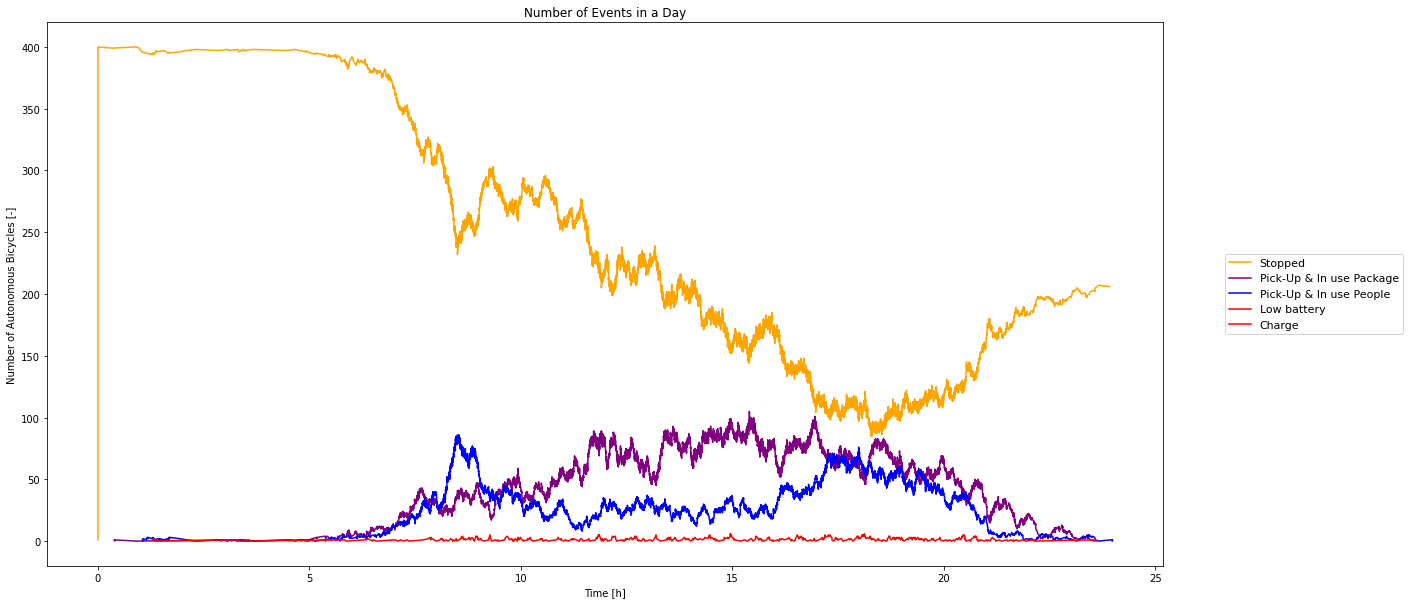

In [98]:
#Plot
plt.figure(figsize=(20,10))
plt.plot( 'Time', 'Count', data = stopped_count,   color='orange', label="Stopped")
# plt.plot( 'Time', 'Count', data = inuse_count, color='olive', label="In use")
# plt.plot( 'Time', 'Count', data = pickup_count,   color='green', label="Pick-Up")
plt.plot( 'Time', 'Count', data = pickup_inuse_p_count,   color='purple', label="Pick-Up & In use Package")
plt.plot( 'Time', 'Count', data = pickup_inuse_u_count,   color='blue', label="Pick-Up & In use People")
plt.plot( 'Time', 'Count', data = lowbattery_count,   color='red', label="Low battery")
plt.plot( 'Time', 'Count', data = charging_count,   color='red', label="Charge")
#plt.plot( 'Time', 'Count', data = relocating_count,   color='navy', label="Relocating")
plt.legend( loc='center left', bbox_to_anchor=(1.05, 0.5),fontsize=11)
plt.title('Number of Events in a Day')
plt.xlabel('Time [h]') 
plt.ylabel('Number of Autonomous Bicycles [-]') 
plt.show()

In [99]:
user_u_200=user_df_u.loc[user_df_u['NumBikes']==200]

(array([650., 615., 424., 276., 169., 114.,  68.,  54.,  13.,   3.]),
 array([ 0.  ,  1.63,  3.26,  4.89,  6.52,  8.15,  9.78, 11.41, 13.04,
        14.67, 16.3 ]),
 <BarContainer object of 10 artists>)

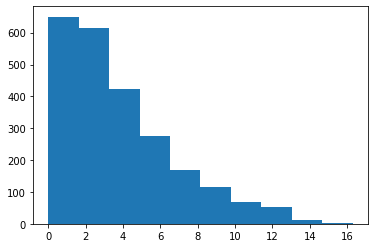

In [100]:
plt.hist(user_u_200['Wait Time (min)'])